# Introduction to Biomedical Data Analysis
### Teaching Notebook for Undergraduate Life Sciences

**Topic:** Exploring the Diabetes Health Indicators Dataset (Kaggle)

**Objective:** Learn how to load, explore, visualize, and draw insights from real-world biomedical datasets.\
We’re trying to predict whether a person has **diabetes (1) or not (0)** based on many health indicators (like BMI, smoking habits, physical activity, etc.) using a machine learning model called a **Random Forest**.

Dataset source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


In [3]:
# Install required packages (run only if not installed)
# !pip install pandas matplotlib seaborn scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load the Dataset

In [8]:
# Replace the file path with your local path if needed
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Basic Data Exploration

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Visualize Some Key Features

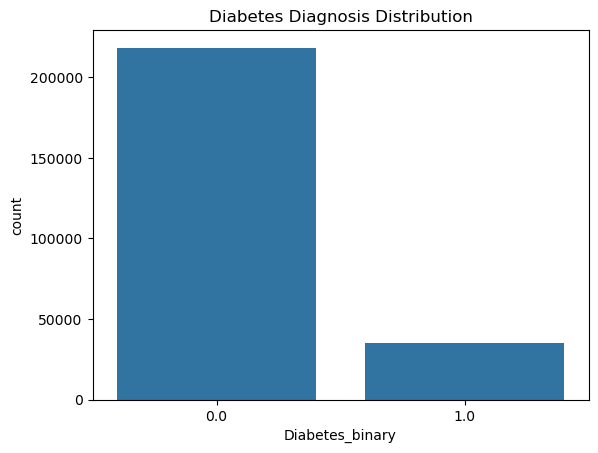

In [14]:
sns.countplot(data=df, x='Diabetes_binary')
plt.title('Diabetes Diagnosis Distribution')
plt.show()

## Build a Simple Machine Learning Model

In [17]:
X = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65605
         1.0       0.47      0.17      0.25     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.57      0.59     76104
weighted avg       0.82      0.86      0.83     76104



## Summary
This notebook showed how to load a real biomedical dataset, explore it using Python, visualize key variables, and build a simple classification model to predict diabetes outcomes.

This forms a foundation for deeper bioinformatics and health informatics analysis using open datasets.

### The Bar Chart
At the top of the image is a bar chart showing how many people in the dataset:\
	**• Do NOT have diabetes (labelled as 0)\
	• Do have diabetes (labelled as 1)**

You can see that most people in the dataset **do not have diabetes** — the left bar is much taller. This is called an **imbalanced dataset**, and it’s very common in real-life healthcare data.


### The Model’s Performance Report

Below the code, there’s a classification report that tells us how well the model did. 

*Class 0 = No Diabetes*\
	**• Precision: 0.88** → When the model says “no diabetes,” it’s right 88% of the time.\
	**• Recall: 0.97** → It catches 97% of the people who truly do not have diabetes.\
	**• F1-score: 0.92** → A balanced measure of precision and recall; this is very good.

*Class 1 = Diabetes*\
	**• Precision: 0.47** → When the model says “diabetes,” it’s right only 47% of the time.\
	**• Recall: 0.17** → It only catches 17% of people who actually have diabetes.\
	**• F1-score: 0.25** → A low score, meaning it’s not doing a good job finding diabetic cases.

**Overall Accuracy vs. Real Usefulness**
	• The model’s overall accuracy is 86%, but that’s misleading.
	• Why? Because the model is great at predicting non-diabetes cases (which are the majority), but bad at finding actual diabetes cases, which is what matters in healthcare.

This is a common problem when the data has way more healthy people than sick people — the model gets “lazy” and mostly just guesses “no diabetes” to get a high accuracy score.

### What Can We Do Next?
To improve this model, we could:\
	• Use **balancing techniques (like oversampling or undersampling)** to even out the dataset.\
	• Try more **advanced models or adjust the model’s priorities** to care more about catching diabetes cases.\
	• Use **feature selection** to pick the most useful health indicators.\
	• **Improve data quality** or add more cases of diabetes to the training data.

Even when a model shows high accuracy, we must look deeper. In real healthcare, missing diabetic patients is risky — so we need models that focus on the minority class, not just overall performance.